In [1]:
# importing the necessary dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Importing Dataset
train_df = pd.read_csv('D:/AIMT/Sem 2/AML 2404/Dataset/sign_mnist_train/sign_mnist_train.csv')
test_df = pd.read_csv('D:/AIMT/Sem 2/AML 2404/Dataset/sign_mnist_test/sign_mnist_test.csv')

In [3]:
# Displaying first 5 rows
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
# Displaying shape of train and test dataset
train_df.shape, test_df.shape

((27455, 785), (7172, 785))

In [5]:
# Displaying Labels values
labels = train_df['label'].values

In [6]:
print("Missing values:\n", train_df.isnull().sum())

# Check for duplicates
print("Duplicate rows:", train_df.duplicated().sum())

Missing values:
 label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64
Duplicate rows: 0


In [7]:
# Function to show images
def show_images(images,labels):
    """Reshape and show images with labels."""
    images = images.values.reshape(-1,28,28,1)

    """Get unique labels from labels."""
    unique_labels = labels.unique()

    """Create a figure and axes for displaying images."""
    fig,ax = plt.subplots(2,5)
    fig.set_size_inches(10, 5)

    """Iterate over images and labels to display."""
    k =0
    for i in range(2):
        for j in range(5):
            ax[i,j].imshow(images[k],cmap='gray')
            ax[i,j].set_title(str(unique_labels[labels[k]]))
            k = k+1;

    """Turn off axis labels."""
    #     plt.axis('off')

    """Tighten the layout to avoid overlaps."""
    plt.tight_layout()

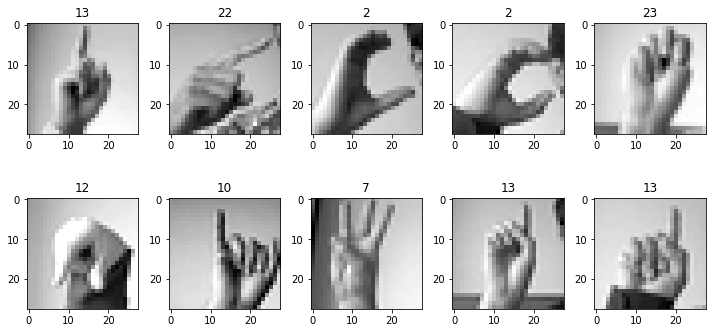

In [8]:
# calling show_images function
show_images(train_df.drop(columns='label'), train_df['label'])

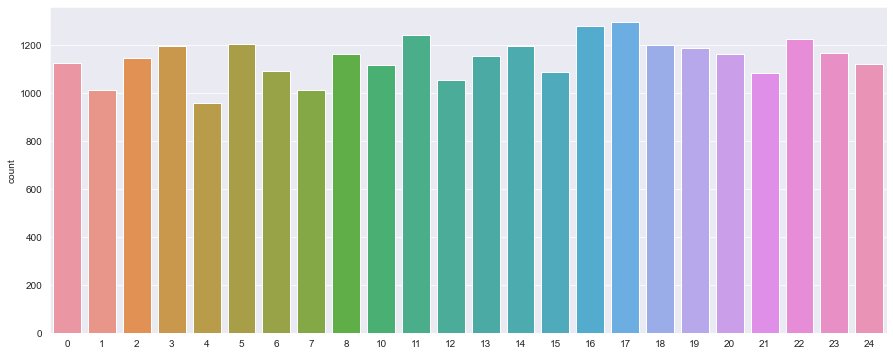

In [9]:
# Creating 15 inch figure
plt.figure(figsize=(15,6))

# Setting darkgrid style
sns.set_style("darkgrid")

# Count plot on x-axis labels
sns.countplot(x=labels)

# Showing plot
plt.show()

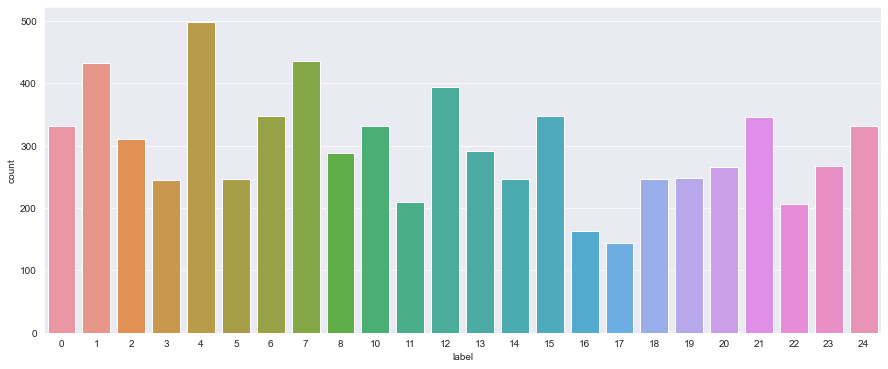

In [10]:

plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
sns.countplot(x=test_df['label'])
plt.show()

In [11]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [12]:
# dropping label column from train_df
train_df.drop('label',axis=1,inplace=True)

In [13]:
# Reshape each image to 28x28 pixels
images = train_df.values
images = np.array([np.reshape(i,(28,28)) for i in images])

# Flatten each image into 1D array
images = np.array([i.flatten() for i in images])

In [14]:
from sklearn.preprocessing import LabelBinarizer

# Label Binarizer
label_binarizer = LabelBinarizer()

# Transform Labels to Binarized Form
labels = label_binarizer.fit_transform(labels)

In [15]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [16]:
plt.rcParams["axes.grid"] = False

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


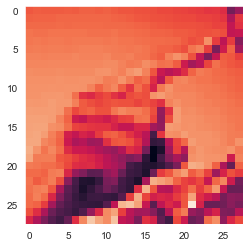

In [17]:
# Select the index of the image to display
index = 1

# Display the label of the selected image
print(labels[index])

# Display the selected image using matplotlib
plt.imshow(images[index].reshape(28,28))
plt.show()

In [18]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [19]:
# Use openCV to view 10 random images from our training data

import cv2

# Display 10 random images
for i in range(0,10):
    # Get random index within range of images
    rand = np.random.randint(0,len(images))
    input_im = images[rand]
    
    # Reshape image and convert to uint8
    sample = input_im.reshape(28,28).astype(np.uint8)
    # Upscale image using cv2
    sample = cv2.resize(sample, None, fx=10, fy=10, interpolation = cv2.INTER_CUBIC)
    
    # Display image using cv2
    cv2.imshow("Sample Image",sample)
    cv2.waitKey()
    
# Close all open windows
cv2.destroyAllWindows()

In [20]:
#split data into X_train, X_test, y_train and y_test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images,labels,test_size=0.3, random_state=101)

In [21]:
# Start Loading our tensorflow modules and define our batch size etc

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [22]:
batch_size =128
num_classes = 24
epochs = 10

In [23]:
#Scale our images
X_train = X_train/255
X_test = X_test/255

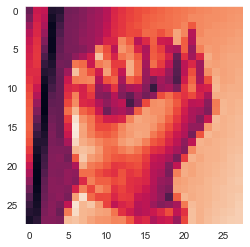

In [24]:
#Reshape them into the size required by TF and Keras
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

plt.imshow(X_train[0].reshape(28,28))

In [25]:
# Create our CNN Model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

# Sequential model with CNN
model = Sequential()

# 2D Convolution layer, 64 filters, kernel size 3x3
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28,1))) 

# Max pooling layer, pool size 2x2
model.add(MaxPooling2D(pool_size = (2, 2)))

# Another 2D Convolution layer, 64 filters, kernel size 3x3
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))

# Max pooling layer, pool size 2x2
model.add(MaxPooling2D(pool_size = (2, 2)))

# Another 2D Convolution layer, 64 filters, kernel size 3x3
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu')) 

# Max pooling layer, pool size 2x2
model.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the output
model.add(Flatten())

# Dense layer, 128 neurons, activation 'relu'
model.add(Dense (128, activation = 'relu'))

# Dropout layer, dropout rate 0.20
model.add(Dropout (0.20))

# Output layer, 'num_classes' neurons, activation 'softmax'
model.add(Dense (num_classes, activation = 'softmax'))

In [26]:
#Compile Model
model.compile(loss = 'categorical_crossentropy',
             optimizer = Adam(), metrics= ['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)          0

In [28]:
#Train model

history = model.fit(X_train, y_train, validation_data= (X_test,y_test), epochs=epochs, batch_size = batch_size)

Epoch 1/10
151/151 [==============================] - 11s 68ms/step - loss: 2.5926 - accuracy: 0.2009 - val_loss: 1.6071 - val_accuracy: 0.5175
Epoch 2/10
151/151 [==============================] - 10s 68ms/step - loss: 1.2641 - accuracy: 0.5816 - val_loss: 0.7812 - val_accuracy: 0.7528
Epoch 3/10
151/151 [==============================] - 10s 69ms/step - loss: 0.7440 - accuracy: 0.7476 - val_loss: 0.5058 - val_accuracy: 0.8365
Epoch 4/10
151/151 [==============================] - 13s 89ms/step - loss: 0.4886 - accuracy: 0.8366 - val_loss: 0.3215 - val_accuracy: 0.9023
Epoch 5/10
151/151 [==============================] - 13s 89ms/step - loss: 0.3414 - accuracy: 0.8847 - val_loss: 0.2009 - val_accuracy: 0.9467
Epoch 6/10
151/151 [==============================] - 12s 78ms/step - loss: 0.2412 - accuracy: 0.9227 - val_loss: 0.1351 - val_accuracy: 0.9660
Epoch 7/10
151/151 [==============================] - 12s 79ms/step - loss: 0.1702 - accuracy: 0.9464 - val_loss: 0.0935 - val_accuracy:

In [29]:
model.save("sign_mnist_cnn_10_epochs.h5") # Save trained model
print("Model Saved") # Confirmation message

Model Saved


C:\Users\Akash\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


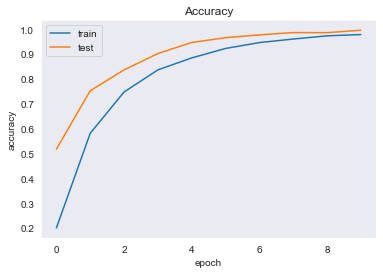

In [30]:
# View our training history graphically 

# Plot training accuracy
plt.plot(history.history['accuracy']) 

# Plot validation accuracy
plt.plot(history.history['val_accuracy'])

# Set plot title
plt.title("Accuracy")

# Set x-axis label
plt.xlabel('epoch')

# Set y-axis label
plt.ylabel('accuracy')

# Create legend for the plot
plt.legend(['train', 'test'])

# Display the plot
plt.show()

In [31]:
# Reshape our test data so that we can evaluate it's performance on unseen data 
# Get labels and drop label column
test_labels = test_df['label']
test_df.drop('label', axis= 1, inplace=True)

# Convert data to 2D arrays and reshape to match model
test_images = test_df.values
test_images = np.array([np.reshape(i, (28,28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

# One-hot encode labels
test_labels = label_binarizer.fit_transform(test_labels)

# Reshape images for model prediction
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

# Get model predictions
y_pred = model.predict(test_images)

225/225 [==============================] - 2s 10ms/step


In [32]:
# Get our accuracy score 
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, y_pred.round())

0.7667317345231456

In [33]:
# Create function to match label to letter 
def getLetter(result):
    classLabels = { 0: 'A',
                    1: 'B',
                    2: 'C',
                    3: 'D',
                    4: 'E',
                    5: 'F',
                    6: 'G',
                    7: 'H',
                    8: 'I',
                    9: 'K',
                    10: 'L',
                    11: 'M',
                    12: 'N',
                    13: '0',
                    14: 'P',
                    15: 'Q',
                    16: 'R',
                    17: 'S',
                    18: 'T',
                    19: 'U',
                    20: 'V',
                    21: 'W',
                    22: 'X',
                    23: 'Y'}
    try:
        res =  int(result)
        return classLabels[res]
    except:
        return "Error"

## Test on Actual Webcam Input

In [34]:
import tensorflow as tf
model = tf.keras.models.load_model('sign_mnist_cnn_10_epochs.h5')

In [35]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    
    # Flip frame horizontally
    frame = cv2.flip(frame, 1)
    
    # Define region of interest
    roi = frame[100:400, 320:620]
    
    # Show original roi
    cv2.imshow('roi', roi)
    
    # Convert roi to grayscale
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    
    # Resize roi to match model input size
    roi = cv2.resize(roi, (28, 28), interpolation = cv2.INTER_AREA)
    
    # Show grayscale roi
    cv2.imshow('roi scaled and gray', roi)
    
    # Copy frame for modification
    copy = frame.copy()
    
    # Draw rectangle around roi on copy
    cv2.rectangle(copy, (320, 100), (620, 400), (255,0,0), 5)
    
    # Reshape roi to match model input shape
    roi = roi.reshape(1,28,28,1)
    
    # Predict digit using the trained model
    result = model.predict(roi)
    predicted_class = np.argmax(result)
    
    # Display predicted digit on the copy
    cv2.putText(copy, getLetter(predicted_class), (300, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    
    # Show the copy with the rectangle and the predicted digit
    cv2.imshow('frame', copy)
    
    # Exit loop when the 'Enter' key is pressed
    if cv2.waitKey(1) == 13:
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 18ms/step


KeyboardInterrupt: 

Performance is very low. Not able to any alphabet.
So now going to use large dataset which have more alphabet images.

## let's Use Keras's Data Augmentation to enhance our dataset

In [3]:
import tensorflow.keras
from tensorflow.keras. preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization 
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [4]:
batch = 32
image_size = 200
img_channel = 3
n_classes = 36

In [5]:
train_path = 'ASL_Dataset/train'
val_path = 'ASL_Dataset/val'

In [6]:
# create ImageDataGenerator object with specified rescale parameter
datagen = ImageDataGenerator(rescale= 1.0 / 255)

In [22]:
# Generate image data generator for training and validation sets
train_data = datagen.flow_from_directory(directory=train_path,
                                          target_size=(image_size, image_size),
                                          batch_size=batch,
                                          class_mode='categorical')

val_data = datagen.flow_from_directory(directory=val_path,
                                        target_size=(image_size, image_size),
                                        batch_size=batch,
                                        class_mode='categorical',
                                        shuffle=False)

Found 2012 images belonging to 36 classes.
Found 503 images belonging to 36 classes.


In [23]:
model = Sequential()
# input layer
# Block 1
model.add(Conv2D(32,3,activation='relu',padding='same',input_shape = (image_size,image_size,img_channel)))
model.add(Conv2D(32,3,activation='relu',padding='same'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.2))

# Block 2
model.add(Conv2D(64,3,activation='relu',padding='same'))
model.add(Conv2D(64,3,activation='relu',padding='same'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.3))

#Block 3
model.add(Conv2D(128,3,activation='relu',padding='same'))
model.add(Conv2D(128,3,activation='relu',padding='same'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.4))

# fully connected layer
model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(36, activation='softmax'))



model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 200, 200, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 200, 200, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 100, 100, 32)      0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 100, 100, 32)      0         
                                                                 
 conv2d_14 (Conv2D)          (None, 100, 100, 64)      18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 100, 100, 64)      36928     
                                                      

In [24]:
# Stop training when validation loss stops improving
early_stoping = EarlyStopping(monitor='val_loss', 
                              min_delta=0.001,
                              patience= 5,
                              restore_best_weights= True, 
                              verbose = 0)

# Reduce learning rate when validation accuracy plateaus
reduce_learning_rate = ReduceLROnPlateau(monitor='val_accuracy', 
                                         patience = 2, 
                                         factor=0.5 , 
                                         verbose = 1)

In [25]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [26]:
# fit the model to the data
asl_class = model.fit(train_data, 
                      validation_data= val_data, 
                      epochs=30, 
                      callbacks=[early_stoping,reduce_learning_rate],
                      verbose = 1)

Epoch 1/30
63/63 [==============================] - 226s 4s/step - loss: 2.1672 - accuracy: 0.3956 - val_loss: 0.6527 - val_accuracy: 0.8032 - lr: 0.0010
Epoch 2/30
63/63 [==============================] - 232s 4s/step - loss: 0.6165 - accuracy: 0.8191 - val_loss: 0.3228 - val_accuracy: 0.9006 - lr: 0.0010
Epoch 3/30
63/63 [==============================] - 217s 3s/step - loss: 0.3122 - accuracy: 0.8981 - val_loss: 0.2206 - val_accuracy: 0.9245 - lr: 0.0010
Epoch 4/30
63/63 [==============================] - 221s 4s/step - loss: 0.1836 - accuracy: 0.9379 - val_loss: 0.1984 - val_accuracy: 0.9324 - lr: 0.0010
Epoch 5/30
63/63 [==============================] - 229s 4s/step - loss: 0.1248 - accuracy: 0.9553 - val_loss: 0.1983 - val_accuracy: 0.9503 - lr: 0.0010
Epoch 6/30
63/63 [==============================] - 219s 3s/step - loss: 0.0987 - accuracy: 0.9717 - val_loss: 0.2330 - val_accuracy: 0.9463 - lr: 0.0010
Epoch 7/30
63/63 [==============================] - ETA: 0s - loss: 0.0882 -

## Now let's test the model

In [27]:
# Evaluate for train generator
loss,acc = model.evaluate(train_data , verbose = 0)

print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)

# Evaluate for validation generator
loss,acc = model.evaluate(val_data, verbose = 0)

print('The accuracy of the model for validation data is:',acc*100)
print('The Loss of the model for validation data is:',loss)

The accuracy of the model for training data is: 98.55864644050598
The Loss of the model for training data is: 0.03443390503525734
The accuracy of the model for validation data is: 93.24055910110474
The Loss of the model for validation data is: 0.1984224021434784


In [28]:
model_json = model.to_json()
with open("sign_asl_cnn_30_epochs.json", "w") as json_file:
    json_file.write(model_json)
print('Model Saved')
model.save('sign_asl_cnn_30_epochs.h5')
model.save_weights('model-sign_asl_cnn_30_epochs_weight.h5')
print('Weights saved')

Model Saved


C:\Users\Akash\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Weights saved


In [1]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np
classifier = load_model('sign_asl_cnn_30_epochs.h5')

C:\Users\Akash\anaconda3\lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.12.2 when it was built against 1.12.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [2]:
# Load a pre-trained classifier or model for making predictions
# Replace 'classifier' with your actual model or classifier

cap = cv2.VideoCapture(0)
def classes(result):
    class_labels = {i: str(i) if i < 10 else chr(65 + i - 10) for i in range(36)}
    return class_labels[result]

# class_labels = {0:'0', 1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9',10:'A',11:'B',12:'C',13:'D',
#                14:'E',15:'F',16:'G',17:'H',18:'I',19:'J',20:'K',21:'L',22:'M',23:'N',24:'O',25:'P',26:'Q',27:'R',
#                28:'S',29:'T',30:'U',31:'V',32:'W',33:'X',34:'Y',35:'Z'}
while True:
    
    
    ret, frame = cap.read()
    
    # Flip the frame horizontally
    frame = cv2.flip(frame, 1)
    
    # Define region of interest
    roi = frame[100:300, 320:520]  # Adjust the ROI dimensions (200x200)
    
    cv2.imshow('roi', roi)
    
    # Convert ROI to grayscale
#     roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    
    # Resize ROI to (200, 200) and convert it to 3 channels
    roi = cv2.resize(roi, (200, 200), interpolation=cv2.INTER_AREA)
#     roi = cv2.cvtColor(roi, cv2.COLOR_GRAY2BGR)
    hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    
    lower_yellow = np.array([93, 72, 51])
    upper_yellow = np.array([224, 194, 183])
    mask = cv2.inRange(hsv, lower_yellow, upper_yellow)
    roi = cv2.bitwise_and(roi,roi, mask= mask)
    # Scale the pixel values to the range [0, 1]
#     roi = roi / 255.0
    
    cv2.imshow('roi scaled and color', roi)
    
    copy = frame.copy()
    
    cv2.rectangle(copy, (320, 100), (520, 300), (255, 0, 0), 5)
    
    # Reshape ROI for prediction
    roi = roi.reshape(1, 200, 200, 3)  # Ensure it matches your model's input shape
    
    predictions = classifier.predict(roi)
    print("Prediction", predictions)
    
    predicted_class = int(np.argmax(predictions, axis=1)[0])
    
    result = classes(predicted_class)
    
    cv2.putText(copy, str(result), (300, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    cv2.imshow('frame', copy)
    
    if cv2.waitKey(1) == 13:
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 1s 730ms/step
Prediction [[5.0740765e-04 1.1660158e-14 1.8759850e-12 1.1544582e-13 2.4805807e-14
  3.7778554e-14 1.0586279e-11 4.0200438e-13 7.2365586e-12 1.0824605e-14
  5.0668654e-14 2.3395065e-27 2.7886439e-12 7.4422466e-15 5.5975923e-12
  7.3458137e-22 5.7332850e-09 4.1060369e-21 1.4412926e-08 9.4251829e-10
  2.6982730e-15 1.0259404e-14 2.5253755e-04 4.3380851e-04 1.8488305e-10
  8.4212753e-15 9.9872017e-01 3.0660509e-20 1.9812022e-11 8.5862266e-05
  2.8838363e-07 3.5302138e-13 1.5179639e-17 1.3066407e-18 5.2339860e-08
  6.3883930e-13]]
1/1 [==============================] - 0s 125ms/step
Prediction [[0.02796036 0.02772532 0.02842508 0.02779574 0.02703487 0.02842445
  0.02828341 0.02723026 0.02735809 0.02807206 0.02748496 0.0278749
  0.027074   0.02783437 0.02655493 0.02796572 0.02761745 0.02720402
  0.0278888  0.02706533 0.02833632 0.02804261 0.0281478  0.02801687
  0.02753516 0.02816122 0.02782597 0.02794866 0.02775355 0.02757407
  0.0282524

1/1 [==============================] - 0s 73ms/step
Prediction [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 84ms/step
Prediction [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 92ms/step
Prediction [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 88ms/step
Prediction [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 91ms/step
Prediction [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 86ms/step
Prediction [[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.000000

1/1 [==============================] - 0s 91ms/step
Prediction [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 91ms/step
Prediction [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 84ms/step
Prediction [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 89ms/step
Prediction [[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.0431791e-05 0.0000000e+00 0.0000000e+00 9.9998951e-01 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.

1/1 [==============================] - 0s 83ms/step
Prediction [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
1/1 [==============================] - 0s 82ms/step
Prediction [[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 9.286993e-30 0.000000e+00 1.000000e+00
  0.000000e+00]]
1/1 [==============================] - 0s 110ms/step
Prediction [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 89ms/step
Prediction [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

1/1 [==============================] - 0s 89ms/step
Prediction [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 92ms/step
Prediction [[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 4.2209506e-36
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00]]
1/1 [==============================] - 0s 88ms/step
Prediction [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 82ms/step
Predictio

1/1 [==============================] - 0s 100ms/step
Prediction [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
1/1 [==============================] - 0s 89ms/step
Prediction [[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  2.0728681e-34 1.6704416e-08 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00]]
1/1 [==============================] - 0s 97ms/step
Prediction [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 83ms/step
Predicti

In [19]:
import cv2
import numpy as np
from keras.models import load_model

# Load your pre-trained sign language classifier model
# Replace 'your_model.h5' with the actual filename of your model
model = load_model('sign_asl_cnn_30_epochs.h5')
class_labels = {i: str(i) if i < 10 else chr(65 + i - 10) for i in range(36)}
def preprocess_image(image_path):
    # Read the image
    image = cv2.imread(image_path)
    
    # Resize the image to match the input size of your model
    image = cv2.resize(image, (200, 200))
    
    # Normalize the pixel values to the range [0, 1]
    image = image / 255.0
    
    # Reshape the image to match the input shape of your model
    image = image.reshape(1, 200, 200, 3)
    
    return image

def predict_letter(image_path, model):
    # Preprocess the image
    processed_image = preprocess_image(image_path)
    
    # Make predictions using the model
    predictions = model.predict(processed_image)
    
    # Get the predicted class (assuming it's the class with the highest probability)
    predicted_class = np.argmax(predictions, axis=1)[0]
    # Map the predicted class to the corresponding letter or label
    
    sign_letter = class_labels[predicted_class] #chr(65 + predicted_class) if predicted_class < 26 else str(predicted_class - 26)
    
    return sign_letter

# Example usage
image_path = 'ASL_Dataset/val/B/hand1_b_top_seg_4_cropped.jpeg'  # Replace with the actual path of your uploaded image
predicted_letter = predict_letter(image_path, model)

print(f'The predicted letter is: {predicted_letter}')


1/1 [==============================] - 0s 262ms/step
The predicted letter is: B


In [2]:
import tensorflow as tf

model = 'sign_asl_cnn_30_epochs.h5'
!tensorflowjs_converter --input_format=keras sign_asl_cnn_30_epochs.h5 tfjs_model
